In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from obspy.io.segy.core import _read_segy

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import pandas as pd


D:\Anaconda3\envs\tensorflow\lib\site-packages\pkg_resources\__init__.py:119: PkgResourcesDeprecationWarning: 3712020b6cb16bc5b932c8b782461bf77c8fea80- is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


In [2]:

# 读取Excel文件中的所有工作表
excel_file_path = 'Lithology classification.xlsx'
all_sheets = pd.read_excel(excel_file_path, sheet_name=None)
DATA1=[]
columns_to_extract = ['File','Depth', 'NR','GG','GR','label']

for sheet_name, df in all_sheets.items():
    print(f"Sheet name: {sheet_name}")
    extracted_df = df[columns_to_extract]

Data_all=extracted_df.to_numpy()
Label_all=Data_all[:,-1]
Data_all=Data_all[:,:-1]
Label_all[Label_all==1]=0
Label_all[Label_all==3]=0
Label_all[Label_all==6]=0
Label_all[Label_all==7]=0
Label_all[Label_all==8]=0
Label_all[Label_all==9]=0
Label_all[Label_all==5]=1
Label_all[Label_all==4]=3

Sheet name: Sheet1


(3014,)

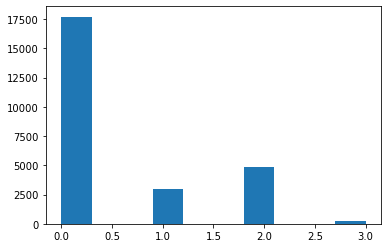

In [3]:
plt.hist(Label_all)
Label_all[Label_all==1].shape

In [4]:


#def normalization_one(data, axis,colinde):
def normalization_one(data, colinde):
    standardized_data=np.copy(data)
    for i in colinde:
        tem=data[:,i]
        minval = np.min(tem)
        maxval = np.max(tem)
        epsilon = 1e-8
        standardized_data[:,i] = (tem - minval) / (maxval - minval + epsilon)
    # 计算均值和标准差
#     minval = np.min(data, axis=axis, keepdims=True)
#     maxval = np.max(data, axis=axis, keepdims=True)
#     #std = np.std(data, axis=axis, keepdims=True)
#     # 防止除以0
#     #std[std == 0] = 1
#     # 标准化
#     epsilon = 1e-8
#     standardized_data = (data - minval) / (maxval - minval + epsilon)

    return standardized_data  


def normalization_(data, axis):
    # 计算均值和标准差
    minval = np.min(data, axis=axis, keepdims=True)
    maxval = np.max(data, axis=axis, keepdims=True)
    # 防止除以0
    #std[std == 0] = 1
    # 标准化
    epsilon = 1e-8
    standardized_data = (data - minval) / (maxval-minval+epsilon)
    return standardized_data  

In [5]:

DATA1=np.load('DATA_lianghe_mulclas.npy',allow_pickle=True)
print(np.unique(DATA1[:,0]))
addfile=[101.,102.,103.,1701.,1702.,1703.,2501.,3301.,3302.]
mask0= np.array([], dtype=int)
for i in range(len(addfile)):
    mask = np.where(DATA1[:, 0] == addfile[i])[0]
    print(addfile[i],len(mask))
    mask0=np.append(mask0,mask)
print(mask0.shape)

#Data_all=np.load('lianghe/Data_all_3curve.npy')
#Data_all=np.load('../../2.28/data_all/Data_all_3curve.npy')

Label_all_=DATA1[mask0,-1]
Data_all_=DATA1[mask0,:-1]
#Label_all_[Label_all_==3]=0
# pick1=np.where(Label_all_==1)[0]
# Label_all_=Label_all_[pick1]
# Data_all_=Data_all_[pick1]

Data_all= np.concatenate((Data_all,Data_all_), axis=0)
Label_all= np.concatenate((Label_all,Label_all_), axis=0)
#Label_all[Label_all==3]=0
# Data_all[:,2]=np.log10(Data_all[:,2]+0.01)
# Data_all[:,3]=np.log10(Data_all[:,3]+0.01)
# Data_all[:,4]=np.log10(Data_all[:,4]+0.01)

[  101.   102.   103.  1701.  1702.  1703.  2501.  3301.  3302.]
101.0 4101
102.0 4301
103.0 4901
1701.0 6776
1702.0 4255
1703.0 4201
2501.0 5201
3301.0 5101
3302.0 6105
(44942,)


[0 3 8]
[[  1.01000000e+02   3.09969600e+06   3.55244283e+07   1.20934600e+03]
 [  1.70100000e+03   3.10265292e+06   3.55249478e+07   1.22543400e+03]
 [  3.30200000e+03   3.10493266e+06   3.55268305e+07   6.51848000e+02]]


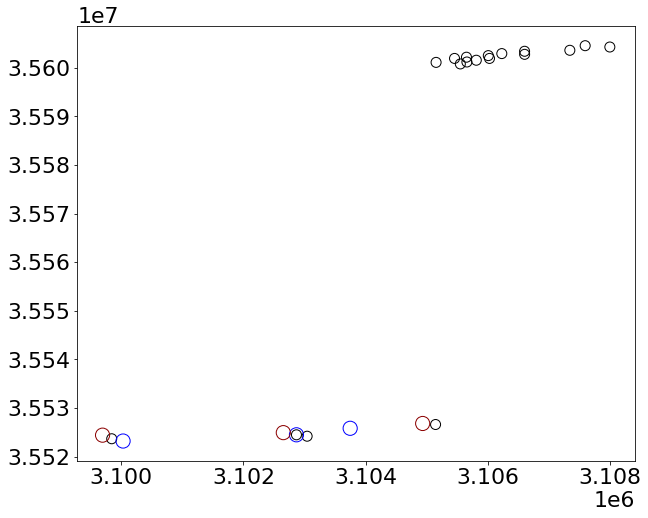

In [6]:
def readpos(fname):
    f=open(fname,'r')
    Val=[]
    for line in f:
        tem=line.split()
        #print(tem)
        val0=[]
        val0.append(float(tem[0]))
        val0.append(float(tem[1]))
        val0.append(float(tem[2]))
        val0.append(float(tem[3]))
        Val.append(val0)
    Val=np.array(Val)
    return Val

trainnames=[ 3101,3102, 3401.,  3501.,  3502.,  3601.,  3701.,3702.,  3801., 
            3802.,  3901.,  4001.,  4002.,1702.,  1703., 102. ,3301]
testnames=[ 103.,  2501.,  1702.]
valnames=[101., 1701., 3302 ]

#addfile=[101.,102.,103.,1701.,1702.,1703.,2501.,3301.,3302.]



fanmes=np.unique(Data_all[:,0])
pos=readpos('coord.txt')

intersection = np.intersect1d(pos[:,0], fanmes)

# 找到交集元素在原数组中的索引
indices1 = np.where(np.isin(pos[:,0], intersection))[0]
pos1=pos[indices1]



intersection = np.intersect1d(pos1[:,0], trainnames)
indices1 = np.where(np.isin(pos1[:,0], intersection))[0]

intersection = np.intersect1d(pos1[:,0], testnames)
indices2 = np.where(np.isin(pos1[:,0], intersection))[0]

intersection = np.intersect1d(pos1[:,0], valnames)
indices3 = np.where(np.isin(pos1[:,0], intersection))[0]
print(indices3)
print(pos1[indices3])
plt.rcParams.update({'font.size': 22}) 
plt.figure(figsize=(10, 8))  # 设置图表尺寸
plt.scatter(pos1[indices1,1],pos1[indices1,2],facecolors='none',s=100,edgecolors='black')
plt.scatter(pos1[indices2,1],pos1[indices2,2],facecolors='none',s=200,edgecolors='blue')
plt.scatter(pos1[indices3,1],pos1[indices3,2],facecolors='none',s=200,edgecolors='darkred')
# for i in indices1:
#     plt.text(pos1[i,1],pos1[i,2],str(pos1[i, 0]),fontsize=10)
# for i in indices1:
#     plt.text(pos1[i,1],pos1[i,2],str(pos1[i, 0]),fontsize=10)

In [230]:
fanmes

array([  101.,   102.,   103.,  1701.,  1702.,  1703.,  2501.,  3101.,
        3102.,  3301.,  3302.,  3401.,  3501.,  3502.,  3601.,  3701.,
        3702.,  3801.,  3802.,  3901.,  4001.,  4002.])

(array([  5.49280000e+04,   1.41680000e+04,   1.20700000e+03,
          2.72000000e+02,   9.40000000e+01,   3.50000000e+01,
          1.20000000e+01,   1.10000000e+01,   3.00000000e+00,
          2.60000000e+01]),
 array([    0. ,   105.8,   211.6,   317.4,   423.2,   529. ,   634.8,
          740.6,   846.4,   952.2,  1058. ]),
 <BarContainer object of 10 artists>)

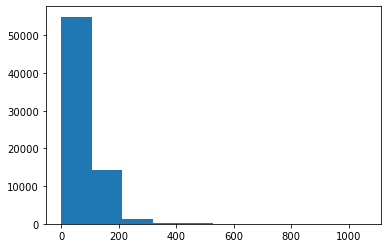

((70756, 5), (70756,), (4543,))

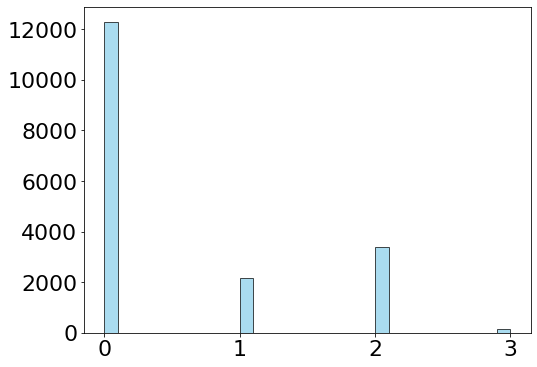

In [7]:
plt.figure(figsize=(8, 6))  # 设置图表尺寸

# 绘制直方图
n, bins, patches = plt.hist(Label_all[:18000], bins=30, edgecolor='black', color='skyblue', alpha=0.7)


Data_all.shape,Label_all.shape,Label_all[Label_all==1].shape



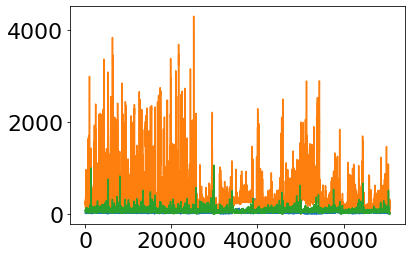

In [12]:

plt.plot(Data_all[:,2])
plt.plot(Data_all[:,3])
plt.plot(Data_all[:,4])
plt.show()

In [40]:
def cutdata(data1,label1):
    data0=[]
    label0=[]
    for i in range(20,len(data1)-20):
        tem=data1[i-20:i+20,:]
        data0.append(tem)
        label0.append(label1[i])
    return np.array(data0),np.array(label0)

fnameunique=np.unique(Data_all[:,0])
print(fnameunique)

DATA0=[]
LABEL0=[]
for i in range(len(fnameunique)):
    indexpick=np.where(Data_all[:,0]==fnameunique[i])[0]
    data0=Data_all[indexpick,:]
    label0=Label_all[indexpick]
#     plt.plot(data0[:,2])
#     plt.plot(data0[:,3])
#     plt.plot(data0[:,4])
#     plt.show()
    #data1_tem=normalization_one(data0,colinde=[2,3,4])
    data1_tem,label1=cutdata(data0,label0)

    data1,label1=cutdata(data0,label0)
    data1=normalization_(data1,axis=1)
    
    data1=np.concatenate((data1,data1_tem[:,:,2:]), axis=2)
    print(data1.shape,label1.shape)
    DATA0.append(data1[:,:,2:])
    LABEL0.append(label1)

DATA0=np.concatenate(DATA0, axis=0)
LABEL0=np.concatenate(LABEL0, axis=0)

print(DATA0.shape,LABEL0.shape)

LABEL0_onehot = to_categorical(LABEL0, num_classes=4)


[  101.   102.   103.  1701.  1702.  1703.  2501.  3101.  3102.  3301.
  3302.  3401.  3501.  3502.  3601.  3701.  3702.  3801.  3802.  3901.
  4001.  4002.]
(4061, 40, 8) (4061,)
(4261, 40, 8) (4261,)
(4861, 40, 8) (4861,)
(6736, 40, 8) (6736,)
(4215, 40, 8) (4215,)
(4161, 40, 8) (4161,)
(5161, 40, 8) (5161,)
(1401, 40, 8) (1401,)
(1161, 40, 8) (1161,)
(7782, 40, 8) (7782,)
(6065, 40, 8) (6065,)
(1361, 40, 8) (1361,)
(1261, 40, 8) (1261,)
(2001, 40, 8) (2001,)
(1921, 40, 8) (1921,)
(1341, 40, 8) (1341,)
(2801, 40, 8) (2801,)
(2081, 40, 8) (2081,)
(2001, 40, 8) (2001,)
(1701, 40, 8) (1701,)
(1541, 40, 8) (1541,)
(2001, 40, 8) (2001,)
(69876, 40, 6) (69876,)


[3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3770
 3771 3772 3773 3774 3775]


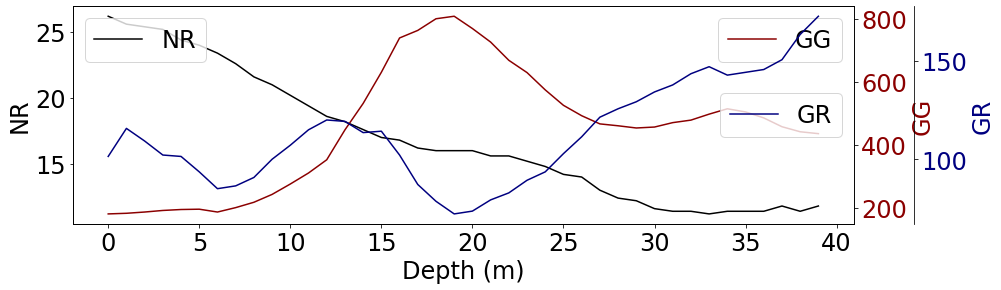

In [41]:




def plot_curves(data1):
    deps=np.arange(0,len(data1[:,0]),1)
    NR=data1[:,3]
    GG=data1[:,4]
    GR=data1[:,5]
    plt.rcParams.update({'font.size': 24}) 
    fig, ax1 = plt.subplots(figsize=(14, 4))
    # 绘制第一条曲线
    ax1.plot(deps, NR, 'black', label='NR')
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('NR', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # 创建第二个Y轴
    ax2 = ax1.twinx()
    ax2.plot(deps, GG, 'darkred', label='GG')
    ax2.set_ylabel('GG', color='darkred')
    ax2.tick_params(axis='y', labelcolor='darkred')

    # 创建第三个Y轴
    ax3 = ax1.twinx()
    # 设置第三个Y轴的位置
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(deps, GR, 'navy', label='GR')
    ax3.set_ylabel('GR', color='navy')
    ax3.tick_params(axis='y', labelcolor='navy')

    # 添加图例
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='center right')
    plt.show()
    
    
pickindex=np.where(LABEL0==1)[0]
print(pickindex[100:120])
K=260
plot_curves(DATA0[pickindex[K],:,:])


In [204]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Add, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.utils import class_weight
# 残差块
def residual_block(x, filters, kernel_size, l2_reg):
    shortcut = x

    # 第一层卷积
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same', kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # 第二层卷积
    x = Conv1D(filters=filters, kernel_size=kernel_size, padding='same', kernel_regularizer=l2(l2_reg))(x)
    x = BatchNormalization()(x)

    # 确保捷径路径的形状与主路径匹配
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv1D(filters=x.shape[-1], kernel_size=1, padding='same', kernel_regularizer=l2(l2_reg))(shortcut)
        shortcut = BatchNormalization()(shortcut)
    
    # 加入捷径连接
    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# 主干网络定义
def build_resnet(input_shape, l2_reg=0.005):
    inputs = Input(shape=input_shape)
    
    # 初始卷积层
    x = Conv1D(filters=16, kernel_size=3, padding='same', kernel_regularizer=l2(l2_reg))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # 残差块和池化层
    x = residual_block(x, filters=16, kernel_size=3, l2_reg=l2_reg)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = residual_block(x, filters=32, kernel_size=3, l2_reg=l2_reg)
    x = MaxPooling1D(pool_size=2)(x)
    
    x = residual_block(x, filters=32, kernel_size=3, l2_reg=l2_reg)
    
    # 平铺层
    x = Flatten()(x)
    
    # 全连接层
    x = Dense(50, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    #x = Dropout(0.3)(x)
    
    # 输出层
    outputs = Dense(4, activation='softmax')(x)
    #outputs = Dense(3, activation='softmax')(x)
    
    # 创建模型
    model = Model(inputs, outputs)
    return model

# 编译模型
def compile_model(model):
    model.compile(optimizer=Adam(),
                  loss=CategoricalCrossentropy(),
                  metrics = ['accuracy'])
    return model

# 生成示例数据
input_shape = (40, 6)
model = build_resnet(input_shape)
#model = compile_model(model)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 打印模型摘要
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 40, 6)]      0                                            
__________________________________________________________________________________________________
conv1d_104 (Conv1D)             (None, 40, 16)       304         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_104 (BatchN (None, 40, 16)       64          conv1d_104[0][0]                 
__________________________________________________________________________________________________
activation_91 (Activation)      (None, 40, 16)       0           batch_normalization_104[0][0]    
___________________________________________________________________________________________

In [205]:
from sklearn.utils import class_weight
# 计算类权重
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(LABEL0), y=LABEL0)
class_weights_dict = dict(enumerate(class_weights))

In [206]:
DATA0.shape,LABEL0.shape
#class_weights_dict = {0: 1.0, 1: 1.0} 
# 训练模型
tf.keras.backend.set_value(model.optimizer.learning_rate, 0.0001)
history = model.fit(
    DATA0[18000:], LABEL0_onehot[18000:],
    epochs=100,
    batch_size=300,
    validation_data=(DATA0[:18000], LABEL0_onehot[:18000]),
    #class_weight=class_weights_dict
)

Train on 51876 samples, validate on 18000 samples
Epoch 1/100
51876/51876 [==============================] - 10s 183us/sample - loss: 2.1334 - accuracy: 0.6732 - val_loss: 2.0986 - val_accuracy: 0.6968
Epoch 2/100
51876/51876 [==============================] - 7s 131us/sample - loss: 1.8797 - accuracy: 0.7377 - val_loss: 1.9040 - val_accuracy: 0.7148
Epoch 3/100
51876/51876 [==============================] - 7s 132us/sample - loss: 1.7608 - accuracy: 0.7596 - val_loss: 1.7987 - val_accuracy: 0.7215
Epoch 4/100
51876/51876 [==============================] - 7s 135us/sample - loss: 1.6632 - accuracy: 0.7743 - val_loss: 1.7338 - val_accuracy: 0.7239
Epoch 5/100
51876/51876 [==============================] - 7s 136us/sample - loss: 1.5768 - accuracy: 0.7888 - val_loss: 1.6816 - val_accuracy: 0.7213
Epoch 6/100
51876/51876 [==============================] - 7s 138us/sample - loss: 1.4987 - accuracy: 0.8000 - val_loss: 1.6316 - val_accuracy: 0.7234
Epoch 7/100
51876/51876 [==================

In [207]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
accuracy = np.insert(accuracy, 0, 0.22)
val_accuracy= np.insert(val_accuracy, 0, 0.15)

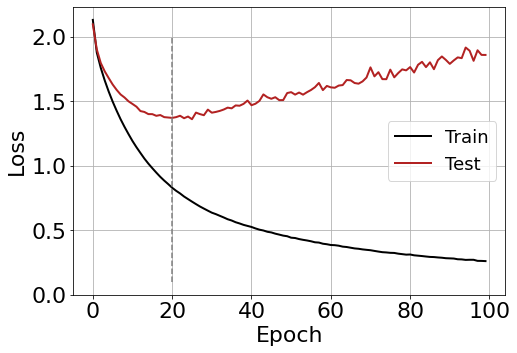

In [212]:

plt.rcParams.update({'font.size': 22}) 
fig, ax1 = plt.subplots(figsize=(7, 5))
plt.grid()
# 绘制第一条曲线
plt.rcParams.update({'font.size': 18}) 
#ax1.plot(data1[:,1], data1[:,2], 'black')
#ax1.plot(data1[:,1], data1[:,3], 'darkred')
plt.plot(loss,label='Train',c='black',linewidth=2)
plt.plot(val_loss,label='Test',c='firebrick',linewidth=2)
plt.plot([20,20],[0.1,2.0],linestyle='--',c='gray')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplots_adjust(top=0.95,bottom=0.15,left=0.14,right=0.997)
plt.savefig('loss.png',dpi=500)

(0.0, 1.0)

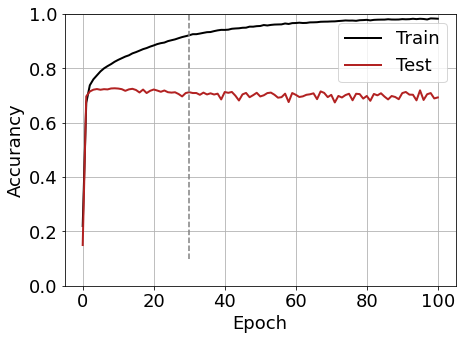

In [209]:
fig, ax1 = plt.subplots(figsize=(7, 5))
plt.grid()
# 绘制第一条曲线
plt.rcParams.update({'font.size': 18}) 
#ax1.plot(data1[:,1], data1[:,2], 'black')
#ax1.plot(data1[:,1], data1[:,3], 'darkred')
plt.plot(accuracy,label='Train',c='black',linewidth=2)
plt.plot(val_accuracy,label='Test',c='firebrick',linewidth=2)
plt.plot([30,30],[0.1,2.0],linestyle='--',c='gray')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accurancy')
plt.savefig('Acc.png',dpi=500)
plt.ylim(0,1)

In [108]:
test_loss, test_accuracy = model.evaluate(DATA0[:1000], LABEL0_onehot[:1000])
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss: 0.5725
Test Accuracy: 0.9420


(array([ 46693.,      0.,      0.,   4434.,      0.,      0.,  15076.,
             0.,      0.,   3673.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <BarContainer object of 10 artists>)

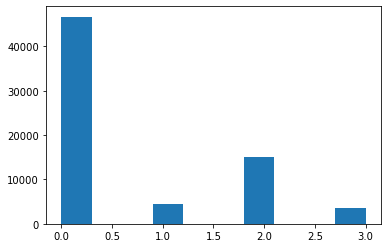

In [73]:
predi=model.predict(DATA0)
predi = np.argmax(predi,axis=1)
plt.hist(predi)


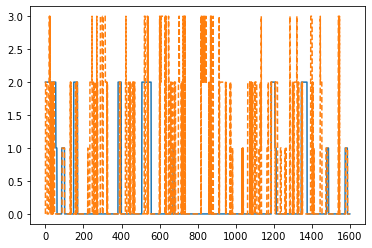

In [202]:
predi=model.predict(DATA0[6400:8000])
predi = np.argmax(predi,axis=1)


plt.plot(LABEL0[6400:8000])
plt.plot(predi,linestyle='--')


In [250]:
np.where(LABEL0==2)[0]

array([ 72216,  72217,  72218, ..., 112385, 112386, 112387], dtype=int64)

In [189]:
model.save_weights('model/RESNET7.26_.ckpt')
model.save('model/RESNET7.26_.h5')

